In this homework, we'll be looking at the infamous Titanic dataset. It's become a canonical example for budding data scientists beginning machine learning and will be a good case study in using logistic regression.

From the project description on [Kaggle]('http://www.kaggle.com/c/titanic-gettingStarted'):
###Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

As with any start of a data science problem make sure you import your libraries!

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import additional libraries here if you need them

import seaborn as sns
from seaborn import plt

from sklearn import metrics


Kaggle has conveniently split the data already into a training set and test set. You can find them in the data folder.

In [3]:
#load data here
#eg from regression lab : 
#x = pd.read_table('http://www.ats.ucla.edu/stat/examples/chp/p054.txt')

df_train = pd.read_csv( 'train.csv')
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_test = pd.read_csv( 'test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


While you could analyze this data many different ways, we'll focus on using logistic regression. For a recap of what logistic regression is look [here]('http://blog.yhathq.com/posts/logistic-regression-and-python.html').

Before creating your model, conduct some exploratory data analysis first. Make a few plots and comment on the results. What interesting patterns do you see?

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#Viz Survied by Categories

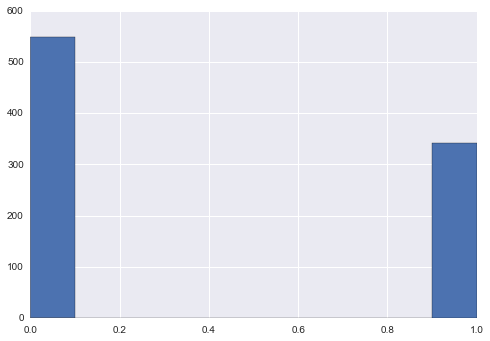

In [6]:
#Code for plot goes here
df_train['Survived'].hist()
#plt.hist(df_train['Survived'])

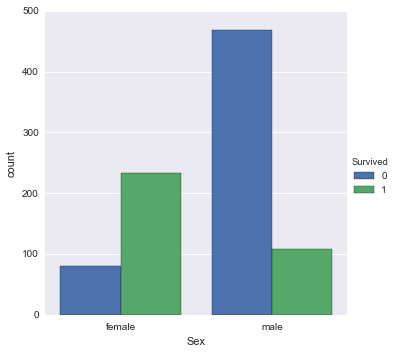

In [7]:
sns.factorplot("Sex", data=df_train, hue="Survived")

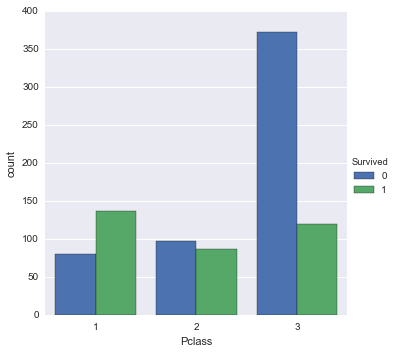

In [9]:
#plt.hist(df_train['Pclass'])
sns.factorplot("Pclass", data=df_train, hue="Survived")

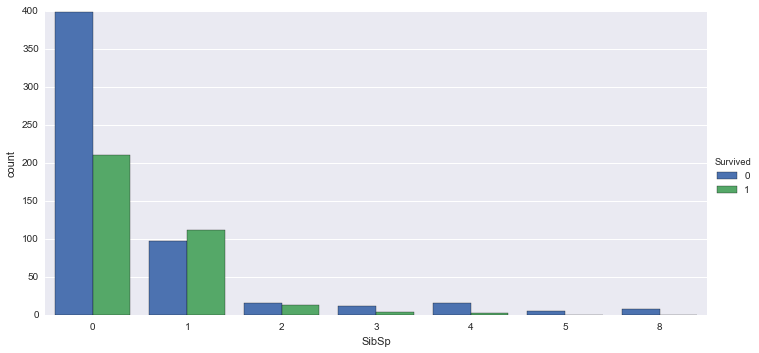

In [10]:
sns.factorplot("SibSp", data=df_train, hue="Survived", aspect=2)

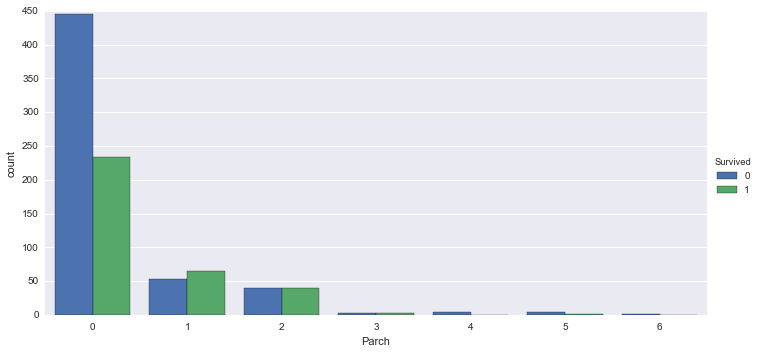

In [11]:
sns.factorplot("Parch", data=df_train, hue="Survived", aspect=2)

#Viz Sex

In [80]:
'''
#view gender, via proportion survived - http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
#fig = plt.figure(figsize=(18,6))
fig = plt.figure(figsize=(12,4))

df_train.Survived[df_train.Sex == 'male'].value_counts()
/float(df_train.Sex[df_train.Sex == 'male'].size).plot(kind='barh',label='Male')

df_train.Survived[df_train.Sex == 'female'].value_counts().plot(kind='barh',label='Female',color='#FA2379') 

plt.title("Survial by Gender (Proportional to Gender Pop)")
plt.legend(loc='best')
'''

SyntaxError: invalid syntax (<ipython-input-80-a627d6642b0e>, line 6)

#Viz Embarked

In [12]:
#Add town name to make variable clear
df_train["embarked_town"] = df_train.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Southampton


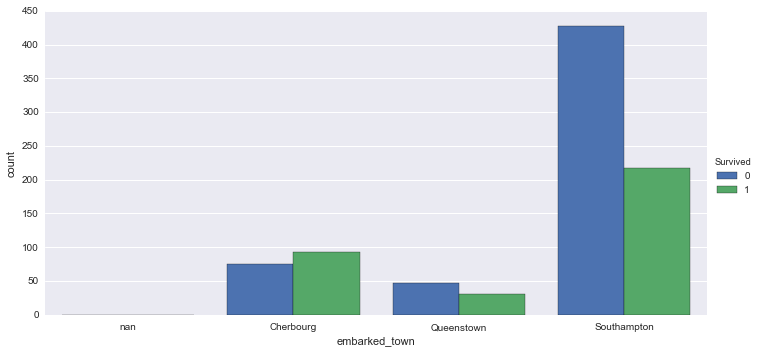

In [13]:
sns.factorplot("embarked_town", data=df_train, hue="Survived", aspect=2)
#embarked is port where boarded, likely correlated with Pclass?

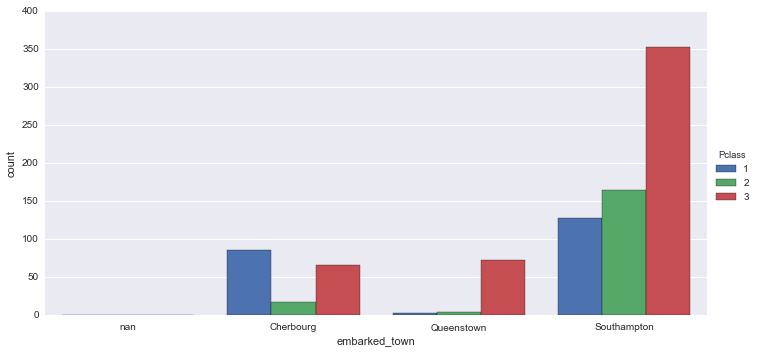

In [14]:
sns.factorplot("embarked_town", data=df_train, hue="Pclass", aspect=2)

In [37]:
#how many nan?
#print df_train['embarked_town'].info

AttributeError: 'Series' object has no attribute 'info'

In [15]:
#looks fairly correlated w/ Pclass... likely should not incude this in the model

#Viz Age

In [16]:
#plt.hist(df_train['Age'])

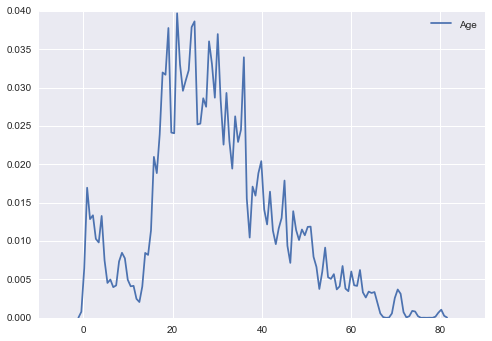

In [17]:
df_train['Age'].head()
#plt.hist(df_train['Age'])

sns.kdeplot(df_train['Age'], bw=0.5)
#sns.rugplot(df_train['Age'])

#sns.FacetGrid?

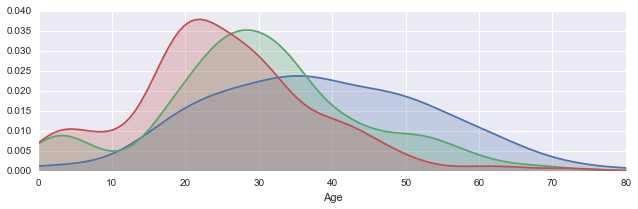

In [18]:
#function to see age distribution per Pclass
fg = sns.FacetGrid(df_train, hue="Pclass", aspect=3)
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0,80))

#how to add legend w/ PClass groups

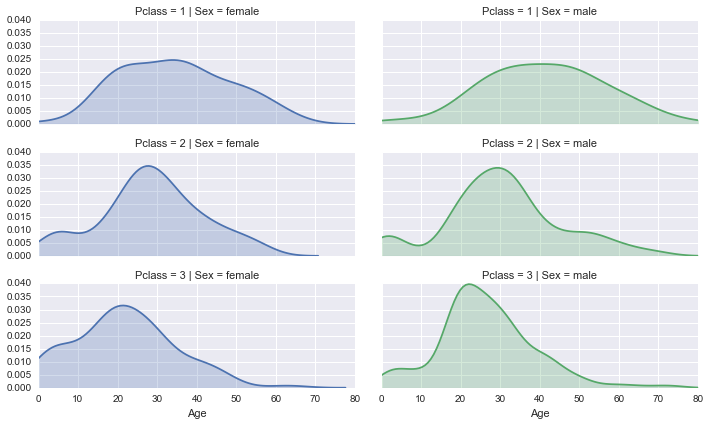

In [19]:
#Age in greater depth
fg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Sex", size=2, aspect=2.5)
fg.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True)
fg.set(xlim=(0,80))


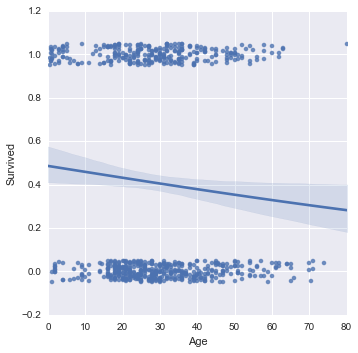

In [20]:
sns.lmplot("Age","Survived", df_train, logistic=True, y_jitter=0.05).set(xlim=(0,80))
#Age alone is not a good indicator

#sns.lmplot?

# Viz Cabin & Deck

In [21]:
#redefine cabine
df_train["Deck"] = df_train.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)

df_train.head(4)
#df_train = df_train.drop(["name", "ticket", "cabin"], axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton,C


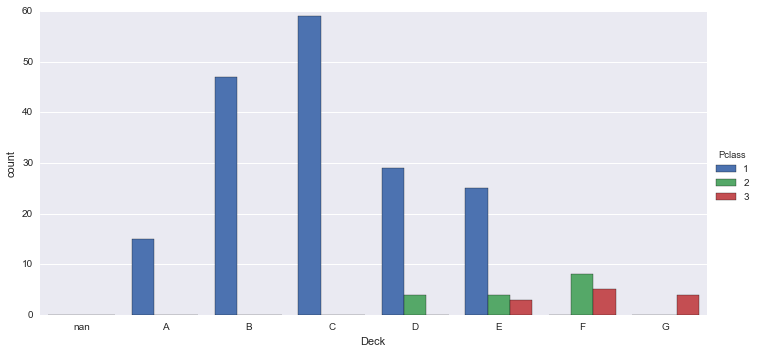

In [22]:
sns.factorplot("Deck", data=df_train, hue="Pclass", aspect=2)


In [23]:
#very correlated with Pclass
#Total count is quite low, and very low for Class 2 and Class 3...
# ==> perhaps there is another non-Deck class we are missing?

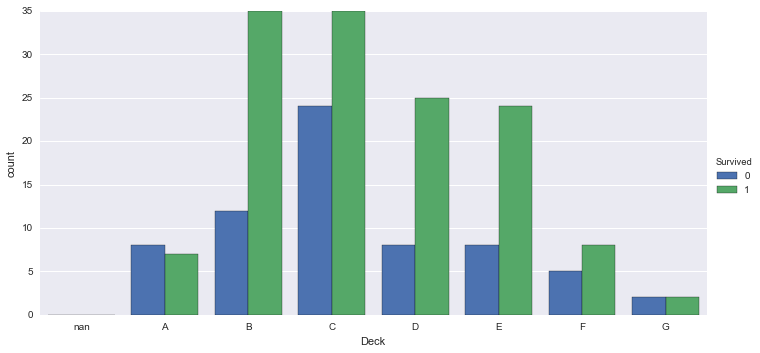

In [24]:
sns.factorplot("Deck", data=df_train, hue="Survived", aspect=2)


In [25]:
#Deck in greater depth

'''Does not work
fg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Survived", size=2, aspect=2.5)
fg.map(sns.factorplot, "Deck", data=df_train, hue="Survived")
#sns.despine(left=True)
'''

'Does not work\nfg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Survived", size=2, aspect=2.5)\nfg.map(sns.factorplot, "Deck", data=df_train, hue="Survived")\n#sns.despine(left=True)\n'

#Fare

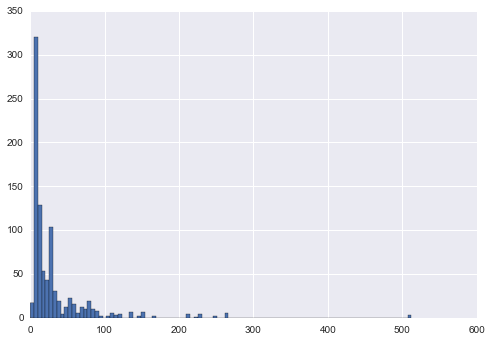

In [26]:
df_train['Fare'].hist(bins=100)

df_train['Fare'].hist?

In [ ]:
df_train['Fare'].hist

(array([ 732.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

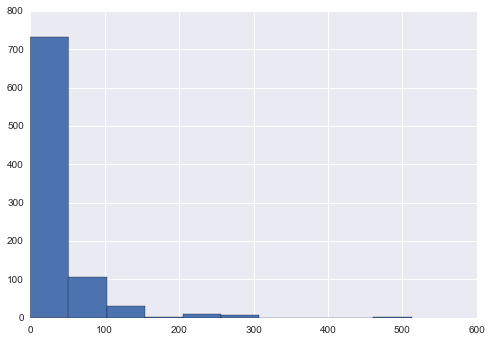

In [27]:
plt.hist( df_train['Fare'])

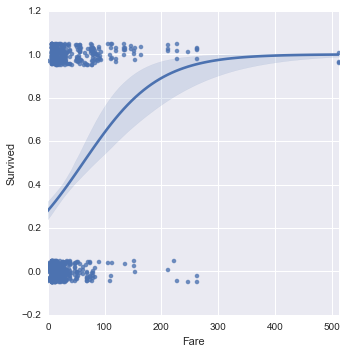

In [28]:
sns.lmplot("Fare" , "Survived" , df_train, logistic=True, y_jitter=0.05).set(
    xlim=(0,max(df_train["Fare"])))


In [31]:
#df_train["fare_scale"] = np.scale( df_train['Fare'])

# Viz Summary Charts

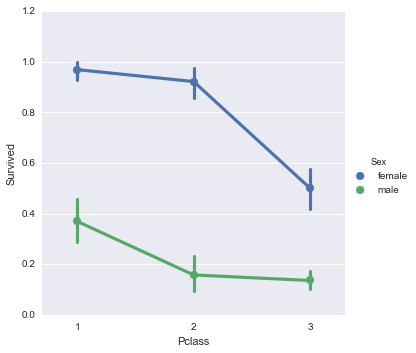

In [32]:
sns.factorplot("Pclass", "Survived", data=df_train, hue="Sex")

#Prepare Data for Model

In [33]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Southampton,NaN


In [39]:
#drop values not useful
#df_train = df_train.drop(["Name", "Ticket", "Cabin", "embark_town"], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Southampton,NaN


In [40]:
print np.count_nonzero(np.isnan(df_train['Age']))

177


In [41]:
#print np.count_nonzero(np.isnan(df_train['Deck']))
def count_deck_NaN( cond, seq ): 
    return sum( 1 for x in seq if x == "NaN" )

print count_deck_NaN( "Nan" , df_train['Deck'])

0


useful cleaning link: 
http://nbviewer.ipython.org/github/jrgilbertson/titanic-predicting-disaster/blob/master/Titanic.ipynb

In [42]:
df_train['Deck2'] = df_train['Deck']
df_train['Deck2'] = df_train['Deck2'].fillna('G') #assuming passengers w/o Deck are MOSTLY Pclass 3


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
embarked_town    889 non-null object
Deck             203 non-null object
Deck2            891 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 111.4+ KB


In [44]:
#how to define as a function of "Pclass" ?
#df_train['Deck2'] = df_train['Deck2'].fillna('G')
'''
#failed code attempt to  define as funciton of Pclass

for i in df_train['Deck']: 
    if np.isnan( i):
        print 'G'
    else: 
        print i
#df_train['Deck_new'] = 
'''

"\n#failed code attempt to  define as funciton of Pclass\n\nfor i in df_train['Deck']: \n    if np.isnan( i):\n        print 'G'\n    else: \n        print i\n#df_train['Deck_new'] = \n"

#Data Cleansing - Dummy Vars
Deck

In [45]:
Deck_dummies = pd.get_dummies(df_train['Deck2'])
Deck_dummies.head(10)

,A,B,C,D,E,F,G
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1


In [46]:
df_train = df_train.join(Deck_dummies)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_town,Deck,Deck2,A,B,C,D,E,F,G
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,Southampton,NaN,G,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,Cherbourg,C,C,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,Southampton,NaN,G,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,Southampton,C,C,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,Southampton,NaN,G,0,0,0,0,0,0,1


In [47]:
#remove cabin G as control for model dummy_var
df_train = df_train.drop(['G'], axis=1)
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,embarked_town,Deck,Deck2,A,B,C,D,E,F
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,...,S,Southampton,NaN,G,0,0,0,0,0,0


#Data Cleansing - Dummy Vars
Sex

In [48]:
sex_dummies = pd.get_dummies(df_train['Sex'])
df_train = df_train.join(sex_dummies)
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck,Deck2,A,B,C,D,E,F,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,NaN,G,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,C,C,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,NaN,G,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,C,C,0,0,1,0,0,0,1,0


In [49]:
df_train = df_train.drop(['male'], axis=1)
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_town,Deck,Deck2,A,B,C,D,E,F,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,Southampton,NaN,G,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,Cherbourg,C,C,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,Southampton,NaN,G,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,Southampton,C,C,0,0,1,0,0,0,1


#Data Cleansing - Dummy vars
Class

In [50]:
#class_dummies = pd.get_dummies(df_train['Pclass'])
#df_train = df_train.join(class_dummies)
#df_train.head(4)

In [51]:
class_dummies = pd.get_dummies(df_train['Pclass'])
class_dummies.columns = ['C1' , 'C2' , 'C3']
class_dummies.head(1)

,C1,C2,C3
0,0,0,1


In [52]:
df_train = df_train.join(class_dummies)


In [53]:
#drop 3 as baseline 
df_train = df_train.drop(['C3'], axis=1)
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck2,A,B,C,D,E,F,female,C1,C2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,G,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,C,0,0,1,0,0,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,G,0,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,C,0,0,1,0,0,0,1,1,0


#Model

Once you have explored the dataset, begin creating your model. You may want to do several iterations of this experimenting with different combinations of features. 

In [54]:
#Create your model here
x_cols = ['C1', 'C2' , 'female' ] 
train_data = sm.tools.add_constant( df_train[x_cols])

y = df_train['Survived']

logit_mdl = smf.Logit( y, train_data)

res = logit_mdl.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Wed, 04 Mar 2015   Pseudo R-squ.:                  0.3032
Time:                        18:09:38   Log-Likelihood:                -413.44
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.145e-77
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.2502      0.159    -14.163      0.000        -2.562    -1.939
C1             1.9055      0.214      8.898      0.000         1.486     2.325
C2             1.0675      0.220      4.842      0.000         0.635     1.500
female         2.6419      0.184     14.350      0.000         2.281     3.003
==============================================================================
"""

In [55]:
#Result interpretation
#Pseudo r-square DOES not look good ... lets visualize this
#all variabels are highly significant

In [56]:
#odds ratio
res.params.map(np.exp)
#being female ==> 14x likelihood of survival, C1 ==> 7x, C2 ==> 3x

const      0.105373
C1         6.722735
C2         2.908225
female    14.039509
dtype: float64

In [57]:
#test prediction
y_hat = res.predict(train_data)
y_hat[801]

0.81140583135694133

[(0, 1)]

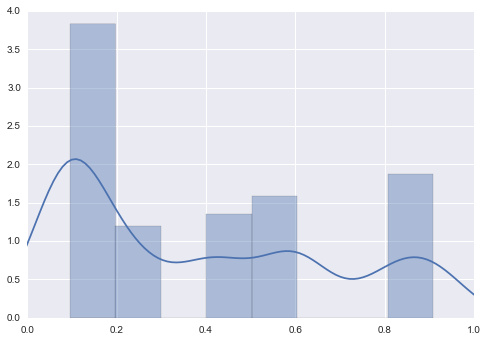

In [58]:
fg = sns.distplot(y_hat)
fg.set(xlim=(0,1))

In [68]:
#print y_hat


In [60]:
df_y_hat = pd.DataFrame( { 'y_hat' : y_hat } )
df_y_hat.head()
#df_test = pd.DataFrame?

,y_hat
0,0.095328
1,0.908639
2,0.596675
3,0.908639
4,0.095328


In [61]:
#join
df_train = df_train.join( df_y_hat)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,A,B,C,D,E,F,female,C1,C2,y_hat
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0.095328
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,1,1,0,0.908639
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,0.596675
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,0,0,1,0,0,0,1,1,0,0.908639
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0.095328


In [62]:
#Visualize the data!

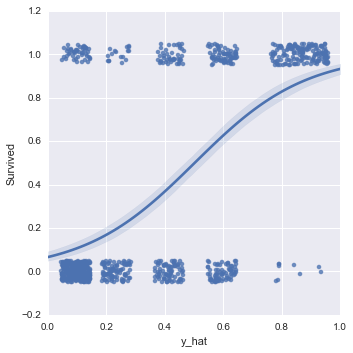

In [63]:
sns.lmplot("y_hat","Survived", df_train, logistic=True, y_jitter=0.05, x_jitter = 0.05).set(xlim=(0,1))

#Interpretation

In [64]:
#how to better visualize this?

In [ ]:
#vis from: http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb

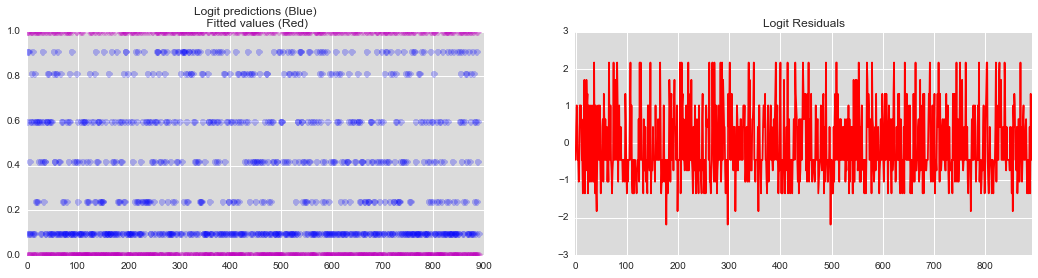

In [96]:
#plot predicted versus actual
plt.figure(figsize=(18,4))
plt.subplot(121, axisbg="#DBDBDB")

#generates predictions from fitted model
x = train_data
y_hat = res.predict(x)
plt.plot(x.index, y_hat, 'bo', x.index, y, 'mo', alpha=0.25)
plt.grid(color='white')
plt.title('Logit predictions (Blue) \n Fitted values (Red)')

#residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals')

#Model 2
http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb

In [87]:
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


In [88]:

# The C() lets our regression know that those variables are categorical.
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'

# create a results dictionary to hold our regression results for easy analysis later        
results = {}

In [97]:
#create regresion freiendly dataframe
'''
y,x = dmatrices(formula, data=df_train, return_type='dataframe')

#instantiate the model
model = smf.Logit(y,x)

#fit model to training data
res = model.fit()

#save teh results for outputing predictions later
results['Logit'] = [res, formula]
res.summary()
'''

"\nfrom patsy import dmatrices\n\ny,x = dmatrices(formula, data=df_train, return_type='dataframe')\n\n#instantiate the model\nmodel = smf.Logit(y,x)\n\n#fit model to training data\nres = model.fit()\n\n#save teh results for outputing predictions later\nresults['Logit'] = [res, formula]\nres.summary()\n"

#How do I test my results?
There are a few ways to evaluate your model. One is by comparing it to the test set and calculating a prediction accuracy. This method would work if you have the outcome variable in your test set. Unfortunately for this dataset, Kaggle has withheld that, probably to prevent overfitting. You could also interpret it further by delving deeper into the summary information the model provides. This could involve looking at confidence intervals and odd ratios for the coefficients. 

In [65]:
#Evaluate results from Kaggle
'''This does not work -- I have not researched it yet
from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details
'''

In [98]:
#load data
df_train = pd.read_csv( 'test.csv')
df_train.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [99]:
'''
#adding column, for what we will be trying to predict
df_test['Survived'] = 1.23
'''

In [ ]:
'''
results
'''

In [ ]:
'''
compared_resuts = ka.predict(test_data, results, 'Logit') # Use your model to make prediction on our test set. 
compared_resuts = Series(compared_resuts)                 # convert our model to a series for easy output
'''

In [ ]:
'''
# output and submit to kaggel
compared_resuts.to_csv("data/output/logitregres.csv")
'''

(Optional) Another way that you can evaluate, leveraging the fact that this is a Kaggle competition, is to upload your results directly to Kaggle and see how your results stack against all the others who have competed. To submit to Kaggle, you'll have to save the output of your predictions to a CSV file and upload that to the Kaggle Titanic contest page. You'll need a Kaggle account to do this. 

Go to the Kaggle page [here]('http://www.kaggle.com/c/titanic-gettingStarted').

If you do submit on Kaggle, post your Kaggle accuracy on Hipchat and see how you compare to your classmates!

*Note that the format for submission for Kaggle competitions is very strict. Make sure you submit it the way they want it.*

In [ ]:
#resorts scored from Kaggle

#Notes:
- There is missing data that you may want to remove before you begin running your analysis.
- Beware of overfitting! Sometimes a good prediction accuracy with the test set may not necessarily translate to the best result you would get on Kaggle.
